# Soal 1
# **Data Preprocessing**

### **Import Library**

In [1]:
import pandas as pd
import numpy as np

### **Read Data**

In [2]:
df = pd.read_csv("Data Tugas 1.csv")
df.head(10)

,price_in_rp,address,facilities,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,certificate,electricity,maid_bedrooms,maid_bathrooms,floors,year_built,property_condition,building_orientation,garages,furnishing
0,2.990000e+09,"Summarecon Bekasi, Bekasi","tempat jemuran, jalur telepon, taman, taman",4.0,4.0,239.0,272.0,0,shm - sertifikat hak milik,4400 mah,0,1,2.0,2017.0,bagus,NaN,0,unfurnished
1,1.270000e+09,"Summarecon Bekasi, Bekasi",taman,3.0,2.0,55.0,69.0,1,hgb - hak guna bangunan,2200 mah,0,0,2.0,NaN,bagus,NaN,0,NaN
2,1.950000e+09,"Summarecon Bekasi, Bekasi","track lari, kolam renang, masjid, taman, ja...",3.0,3.0,119.0,131.0,1,hgb - hak guna bangunan,2200 mah,1,1,2.0,NaN,bagus,NaN,1,unfurnished
3,3.300000e+09,"Summarecon Bekasi, Bekasi","jalur telepon, track lari, track lari, kola...",3.0,3.0,180.0,174.0,0,shm - sertifikat hak milik,3500 mah,1,1,2.0,2016.0,bagus sekali,utara,2,unfurnished
4,4.500000e+09,"Summarecon Bekasi, Bekasi","track lari, kolam renang, taman, jalur telep...",4.0,3.0,328.0,196.0,2,shm - sertifikat hak milik,3500 mah,1,1,2.0,2013.0,bagus,utara,1,unfurnished
5,2.700000e+09,"Summarecon Bekasi, Bekasi","jalur telepon, taman, keamanan, kolam renang",3.0,3.0,136.0,200.0,2,shm - sertifikat hak milik,3500 mah,1,1,2.0,2013.0,bagus,selatan,1,semi furnished
6,2.350000e+09,"Summarecon Bekasi, Bekasi","keamanan, kolam renang",2.0,2.0,144.0,144.0,1,hgb - hak guna bangunan,4400 mah,0,0,2.0,NaN,NaN,utara,1,NaN
7,4.500000e+09,"Summarecon Bekasi, Bekasi","keamanan, kolam renang",4.0,4.0,216.0,250.0,2,hgb - hak guna bangunan,3500 mah,1,1,2.0,NaN,NaN,selatan,1,NaN
8,2.900000e+09,"Summarecon Bekasi, Bekasi",kitchen set,NaN,3.0,200.0,152.0,2,shm - sertifikat hak milik,4400 mah,3,1,2.0,NaN,NaN,selatan,0,semi furnished
9,2.700000e+09,"Summarecon Bekasi, Bekasi","keamanan, kolam renang",3.0,3.0,136.0,200.0,1,shm - sertifikat hak milik,3500 mah,1,1,2.0,NaN,NaN,selatan,1,semi furnished


## **Data Manipulation**

In [3]:
# Cek apakah ada baris duplikat
df.duplicated().any()

True

In [4]:
# Jika ada baris yang terduplikat, hapus baris duplikat tersebut.
# Jangan lupa untuk me-reset nilai index
df = df.drop_duplicates().reset_index(drop = True)

In [5]:
# Cek akan jumlah keberadaan missing value pada tiap kolom
df.isna().sum()

price_in_rp                0
address                    0
facilities                 0
bedrooms                  33
bathrooms                 28
land_size_m2               2
building_size_m2           2
carports                   0
certificate              133
electricity                0
maid_bedrooms              0
maid_bathrooms             0
floors                     6
year_built              1264
property_condition       213
building_orientation    1502
garages                    0
furnishing               373
dtype: int64

In [6]:
# Isi missing value pada variabel bedrooms, bathrooms, floors, dan year_built dengan nilai median dari setiap variabel menggunakan looping

# Buat list variable yang akan diisi
variable = ['bedrooms', 'bathrooms', 'floors', 'year_built']

for cols in variable:

    # Isi variable dengan nilai median
    median = df[cols].median()
    df[cols] = df[cols].fillna(median)

In [7]:
# Isi missing value pada variabel certificate, property_condition, building_orientation, dan furnishing dengan nilai modus dari setiap variabel menggunakan looping
# Gunakan langkah yang sama seperti sebelumnya

variable = ['certificate', 'property_condition', 'building_orientation', 'furnishing']

for cols in variable:
    modus = df[cols].mode()[0]
    df[cols] = modus

In [8]:
# Isi missing value pada variabel yang tersisa dengan nilai rata-rata

variable = ['land_size_m2', 'building_size_m2']

for cols in variable:
    avg = df[cols].mean()
    df[cols] = df[cols].fillna(avg)

In [9]:
# Buat variabel yang menunjukkan usia bangunan, dan hapus variabel year_built

df['building_age'] = 2024 - df['year_built']
df.drop('year_built', axis = 1, inplace = True)

In [10]:
# Variabel address berisikan Desa/Wilayah dan Kota dari suatu bangunan
# Pisahkan Desa dengan Kota menjadi 2 kolom yang berbeda, kemudian hapus variabel address

df[['District', 'City']] = df['address'].str.split(',', expand = True)

In [11]:
# Pisahkan setiap fasilitas yang ada pada facilities, dan simpan tiap baris sebagai list
split = df['facilities'].str.split(',')

# Looping dengan range banyaknya baris pada dataframe
for i in range(len(df)):

    # Hapus spasi yang berlebih pada tiap fasilitas, dan simpan dalam split[i]
    # Gunakan list comprehension
    split[i] = [item.strip().capitalize() for item in split[i]]

    # Buat list kosong
    new_list = []

    # Buat looping untuk menghilangkan duplikasi fasilitas pada suatu list
    for item in split[i]:

        # Gunakan kondisi ketika item tidak ada di list yang kosong dan jika item setidaknya memiliki 1 huruf
        if (item not in new_list) and (len(item) > 0):

            # Tambahkan item ke dalam list kosong
            new_list.append(item)
    
    # Perbarui split[i] dengan new_list
    split[i] = new_list

# Perbarui facilities dengan split
df['facilities'] = split

In [12]:
# Variabel electricity masih memiliki satuan di dalam kolom
# Ubahlah sedemikian rupa supaya variabel electricity hanya menyimpan angka
# Note: Jika baris tidak memiliki angka sama sekali, anggap saja nilainya 0

for i in range(len(df)):
    df['electricity'][i] = df['electricity'][i].split(' ')[0]

    if df['electricity'][i].isnumeric() == True:
        df['electricity'][i] = int(df['electricity'][i])
    else:
        df['electricity'][i] = 0

df['electricity'] = df['electricity'].astype(int)

C:\Users\Raditya Arviandana\AppData\Local\Temp\ipykernel_24356\937007635.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['electricity'][i] = df['electricity'][i].split(' ')[0]
C:\Users\Raditya Arviandana\AppData\Local\Temp\ipykernel_24356\937007635.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['electricity'][i] = int(df['electricity'][i])
C:\Users\Raditya Arviandana\AppData\Local\Temp\ipykernel_24356\937007635.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

## **Data Transformation**

In [13]:
# Import dan install library disini

from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder

In [14]:
# Buatlah dummy untuk variabel Desa, Kota, certificate, property_condition, building orientation, dan furnishing

variabels = ['District', 'City', 'certificate', 'property_condition', 'building_orientation', 'furnishing']

# Gabungkan variabel dummy dengan data asli
# Kemudian hapus variabel Desa, Kota, certificate, property_condition, building orientation, dan furnishing

ohe = OneHotEncoder(sparse = False, handle_unknown = 'ignore')

pd.DataFrame(ohe.fit_transform(df[variabels]), columns = ohe.get_feature_names_out())

C:\Users\Raditya Arviandana\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,District_Alam Sutera,District_Ampera,District_Angke,District_Antasari,District_BSD,District_BSD Anggrek Loka,District_BSD Avani,District_BSD Bukit Golf,District_BSD City,District_BSD De Park,...,City_ Jakarta Barat,City_ Jakarta Pusat,City_ Jakarta Selatan,City_ Jakarta Timur,City_ Jakarta Utara,City_ Tangerang,certificate_shm - sertifikat hak milik,property_condition_baru,building_orientation_selatan,furnishing_unfurnished
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3311,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
3312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
3313,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
3314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0


#### Ubah variabel facilities menjadi binary seperti gambar di bawah ini
Hint: Dapat menggunakan salah satu function dari sklearn.preprocessing

![IMAGE](https://raw.githubusercontent.com/ArviandanaR/Praktikum-Data-Mining-2024/main/Pertemuan%204/Image.png)

In [15]:
# Lakukan langkah seperti di atas, kemudian gabungkan dengan data asli

mlb = MultiLabelBinarizer()

pd.DataFrame(mlb.fit_transform(df['facilities']), columns = mlb.classes_)

,Ac,Ac 1 unit,Ac 2 unit,Ac 3 unit,Akses parkir,Backyard luas,Balkon,Basement,Canopy,Carport,...,Tempat gym,Tempat jemuran,Tempat laundry,Toren 500 liter,Toren 650 liter,Toren air,Track lari,Void,Wastafel,Water heater
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3311,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3312,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3313,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3314,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


# Soal 2
# **Association Rules**

Anda diminta untuk membuat Sistem Rekomendasi Film menggunakan Association Rules untuk dataset yang diberikan. Dataset yang diberikan adalah dataset MovieLens. Dataset ini berisi informasi mengenai film-film, rating pengguna, tag, dll. Anda diminta untuk membangun sistem rekomendasi yang dapat memberikan rekomendasi untuk film-film yang mungkin ingin dilihat pelanggan berdasarkan film-film yang sudah ditonton sebelumnya.

Dataset yang digunakan adalah dataset MovieLens (ml-25m) yang berisi rating bintang 5 dan aktivitas tagging teks bebas dari MovieLens, sebuah layanan rekomendasi film. Dataset ini berisi 27753444 rating dan 1.129 aplikasi tag dari sekitar 62.000 film. Data ini dibuat oleh 162.000 pengguna dan dirilis pada Desember 2019.

<span style="color:blue">**Tugas Anda adalah sebagai berikut:**</span><br>
- Lakukan preprocessing dataset untuk membuat daftar transaksional di mana setiap baris mewakili seorang pengguna dan film-film yang dipilihnya.
- Transformasi daftar gabungan film yang telah telah dilakukan preprocessing sebelumnya menjadi binary input.
- Frequent Itemset Mining: Gunakan algoritma FP-Growth dan Apriori untuk menemukan item-item yang sering muncul bersama dalam dataset.
    - Kode Algoritma Apriori
    - Berikan Penjelasan tentang hasilnya
    - Kode Algoritma FP-Growth
    - Berikan Penjelasan tentang hasilnya
- Gunakan itemset frekuensi yang ditemukan untuk menemukan aturan asosiasi antara item yang muncul bersama dalam dataset.
    - Kode Aturan Asosiasi
    - Urutkan nilai berdasarkan nilai confidence dan lift
    - Berikan Penjelasan tentang hasilnya
- Jalankan Semua Kode

Tulis kode Anda di dalam $pass$ dan jangan mengubah nama variabel.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# $Dataset$

## Mengimpor Dataset

In [2]:
#Download Data Using request, must be executed, and will add the dataset to your main directory.
#import requests, zipfile, io
#zipfile.ZipFile(io.BytesIO(requests.get('https://files.grouplens.org/datasets/movielens/ml-25m.zip').content)).extractall()

: 

## Selecting Data

In [ ]:
ls -a ml-25m

In [3]:
data_movies = pd.read_csv("D:/Kuliah/Matkul/Data Mining/ml-25m (1)/ml-25m/movies.csv")
data_tages = pd.read_csv("D:/Kuliah/Matkul/Data Mining/ml-25m (1)/ml-25m/tags.csv")
data_ratings = pd.read_csv("D:/Kuliah/Matkul/Data Mining/ml-25m (1)/ml-25m/ratings.csv")

## Exploratory

### **Data Film** <br>
Dataset ini berisi judul film dan unique value dari setiap film tanpa nilai duplikat

In [4]:
data_movies.head()


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
data_movies.movieId.value_counts(), print('Number of duplicated unique ids are: ',data_movies.movieId.duplicated().sum())

Number of duplicated unique ids are:  0


(1         1
 162130    1
 162070    1
 162072    1
 162074    1
          ..
 107614    1
 107623    1
 107625    1
 107630    1
 209171    1
 Name: movieId, Length: 62423, dtype: int64,
 None)

### **Data Tages Film** <br>
Dataset ini berisi tag yang ditambahkan ke film ditambah dengan ID pengguna yang bernilai untuk dipertimbangkan sebagai indeks untuk setiap transaksi, Di sisi lain, dataset ini memiliki jumlah ID film yang lebih sedikit daripada dataset peringkat  yang membuat kami memilihnya.


In [6]:
data_tages.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [7]:
data_tages.movieId.value_counts()

260       6180
79132     4767
296       4767
109487    3616
2959      3612
          ... 
128798       1
183647       1
183605       1
128884       1
128534       1
Name: movieId, Length: 45251, dtype: int64

### **Data Rating Film** <br>
Dataset ini berisi tag yang ditambahkan ke film ditambah dengan ID pengguna yang bernilai untuk dipertimbangkan sebagai indeks untuk setiap transaksi, Di sisi lain, dataset ini memiliki jumlah ID film yang lebih sedikit daripada dataset peringkat  yang membuat kami memilihnya.

In [8]:
data_ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [9]:
data_ratings.movieId.value_counts()

356       81491
318       81482
296       79672
593       74127
2571      72674
          ...  
193109        1
112393        1
142793        1
111842        1
200728        1
Name: movieId, Length: 59047, dtype: int64

# $Preprocessing$

### **Merging Dataset** <br>

Dalam kasus ini, inner join dipilih karena kami memerlukan data hanya ketika label movieId ada di kedua dataset.







In [10]:
merge = data_movies.merge(data_tages,on = 'movieId',how = 'inner')
merge

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,791,Owned,1515175493
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1048,imdb top 250,1172144394
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1361,Pixar,1216146311
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3164,Pixar,1223304727
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3164,time travel,1223304729
...,...,...,...,...,...,...
1093355,209063,The Prep School Negro (2012),(no genres listed),96399,Philadelphia,1574021180
1093356,209063,The Prep School Negro (2012),(no genres listed),96399,private school,1574021158
1093357,209063,The Prep School Negro (2012),(no genres listed),96399,quaker,1574021197
1093358,209063,The Prep School Negro (2012),(no genres listed),96399,racism,1574021194


### **Drop Variable** <br>
Drop variabel yang tidak diperlukan

In [11]:
merge.drop(columns=['tag','timestamp','genres'],inplace=True)

In [12]:
merge

,movieId,title,userId
0,1,Toy Story (1995),791
1,1,Toy Story (1995),1048
2,1,Toy Story (1995),1361
3,1,Toy Story (1995),3164
4,1,Toy Story (1995),3164
...,...,...,...
1093355,209063,The Prep School Negro (2012),96399
1093356,209063,The Prep School Negro (2012),96399
1093357,209063,The Prep School Negro (2012),96399
1093358,209063,The Prep School Negro (2012),96399


In [13]:
merge.drop_duplicates(inplace= True)

In [14]:
len(merge.userId.unique())

14592

<span style="color:red">**Code Task 1**</span><br>

Di sini Anda dapat melakukan preprocessing dataset untuk membuat daftar transaksi di mana setiap baris mewakili seorang pengguna dan film yang dipilihnya menggunakan groupby.

In [15]:
merge_list = merge.groupby('userId')['title'].apply(list).reset_index()

merge_list.head()

,userId,title
0,3,[Star Wars: Episode IV - A New Hope (1977)]
1,4,"[Big Lebowski, The (1998), You Only Live Twice..."
2,19,"[Rosemary's Baby (1968), Nausicaä of the Valle..."
3,20,[Star Wars: Episode VI - Return of the Jedi (1...
4,43,[Cliffhanger (1993)]



Validasi daftar yang dibuat per userId.

In [16]:
print(len(merge.userId.unique()))
print(len(merge_list))

14592
14592


In [17]:
merge_list

,userId,title
0,3,[Star Wars: Episode IV - A New Hope (1977)]
1,4,"[Big Lebowski, The (1998), You Only Live Twice..."
2,19,"[Rosemary's Baby (1968), Nausicaä of the Valle..."
3,20,[Star Wars: Episode VI - Return of the Jedi (1...
4,43,[Cliffhanger (1993)]
...,...,...
14587,162495,[Forgetting Sarah Marshall (2008)]
14588,162501,[Gone Girl (2014)]
14589,162512,"[Postman, The (1997), Patriot Games (1992)]"
14590,162521,"[Shaun of the Dead (2004), Hot Fuzz (2007), Dr..."


### **Transformasi Data** <br>
Di sini data ditransfer sebagai binary input untuk diterima oleh algoritma.<br>
Tugas Anda adalah mentransformasi data menjadi binary input dengan metode yang telah Anda eksplor dan beri nama df.

<span style="color:red">**Code Task 2**</span><br>
Anda bisa menggunakan package apa saja yang telah dipelajari

In [18]:
merge_list = merge_list.set_index('userId', drop = True)
merge_list

,title
userId,
3,[Star Wars: Episode IV - A New Hope (1977)]
4,"[Big Lebowski, The (1998), You Only Live Twice..."
19,"[Rosemary's Baby (1968), Nausicaä of the Valle..."
20,[Star Wars: Episode VI - Return of the Jedi (1...
43,[Cliffhanger (1993)]
...,...
162495,[Forgetting Sarah Marshall (2008)]
162501,[Gone Girl (2014)]
162512,"[Postman, The (1997), Patriot Games (1992)]"


In [19]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

In [20]:
df = pd.DataFrame(mlb.fit_transform(merge_list['title']), columns = mlb.classes_)
df

,"""Great Performances"" Cats (1998)",#1 Cheerleader Camp (2010),#Captured (2017),#FollowMe (2019),#Horror (2015),#Stuck (2014),#realityhigh (2017),$ (Dollars) (1971),"$1,000 on the Black (1966)","$100,000 for Ringo (1965)",$9.99 (2008),$ellebrity (Sellebrity) (2012),'49-'17 (1917),'63 Boycott (2016),'68 (1988),'71 (2014),'Gator Bait (1974),'Hellboy': The Seeds of Creation (2004),"'Human' Factor, The (Human Factor, The) (1975)",'Master Harold' ... And the Boys (2010),'Neath Brooklyn Bridge (1942),'Neath the Arizona Skies (1934),'Pimpernel' Smith (1941),'R Xmas (2001),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Twas the Night (2001),'Twas the Night Before Christmas (1974),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),(A)sexual (2011),(Dis)Honesty: The Truth About Lies (2015),(T)ERROR (2015),(The New) War of the Buttons (2011),(Untitled) (2009),*batteries not included (1987),+1 (2013),...All the Marbles (1981),...And God Spoke (1993),...And Justice for All (1979),...First Do No Harm (1997),...ing (2003),...tick... tick... tick... (1970),.45 (2006),.hack Liminality: In the Case of Mai Minase,.hack//Beyond the World (2012),008: Operation Exterminate (1966),009 Re: Cyborg (2012),009-1: The End of the Beginning (2013),1 (2013),1 (2014),1 Buck (2017),1 Chance 2 Dance (2014),1 Night (2017),1. Mai (2008),10 (1979),10 Billion: What's On Your Plate (2015),10 Cent Pistol (2015),10 Cloverfield Lane (2016),10 Days in a Madhouse (2015),10 Items or Less (2006),10 Questions for the Dalai Lama (2006),10 Rillington Place (1971),10 Rules for Sleeping Around (2013),10 Things I Hate About You (1999),10 Years (2011),10 minutes (10 minuta) (2002),10 to Midnight (1983),10%: What Makes a Hero? (2013),10+10 (2011),"10,000 BC (2008)","10,000 Black Men Named George (2002)","10,000 Dollars for a Massacre (1967)",10.0 Earthquake (2014),100 Bloody Acres (2012),100 Days (1991),100 Days Before the Command (1991),100 Days Of Love (2015),100 Days With Mr. Arrogant (2004),100 Degrees Below Zero (2013),100 Dinge (2018),100 Feet (2008),100 Girls (2000),100 Men and a Girl (One Hundred Men and a Girl) (1937),100 Million BC (2008),100 Poems for Stella (2017),100 Rifles (1969),100 Streets (2016),100 Women (2002),100 Years at the Movies (1994),100 Yen Love (2014),100 Yen: The Japanese Arcade Experience (2012),100 metros (2016),100% Love (2011),"1000 Eyes of Dr. Mabuse, The (Die 1000 Augen des Dr. Mabuse) (1960)",1000 Journals (2007),1001 Nights (1990),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),101 Dalmatians II: Patch's London Adventure (2003),101 Rent Boys (2000),101 Reykjavik (101 Reykjavík) (2000),102 Dalmatians (2000),102 Minutes That Changed America (2008),10th & Wolf (2006),"10th Victim, The (La decima vittima) (1965)",10x10 (2018),11 Blocks (2015),11 Days 11 Nights Part 3 (1989),11 Days 11 Nights: Part 1 - Fantasy Becomes Reality (1987),"11 Days, 11 Nights 2 (1990)",11 Harrowhouse (1974),11 Minutes (2015),11 September Vragen (2016),11 x 14 (1977),"11'09""01 - September 11 (2002)",11-11-11 (11-11-11: The Prophecy) (2011),11.22.63 (2016),11/11/11 (2011),11:00 AM (2013),11:14 (2003),11:59 (2005),"11th Hour, The (2007)",12 (2007),12 Angry Men (1957),12 Angry Men (1997),12 Chairs (1971),12 Chairs (1976),12 Dates of Christmas (2011),12 Days of Christmas Eve (2004),"12 Dogs of Christmas, The (2005)",12 Feet Deep (2016),12 Gifts of Christmas (2015),12 Men of Christmas (2009),12 O'Clock Boys (2013),12 Rounds (2009),12 Rounds 3: Lockdown (2015),12 Storeys (Shier lou) (1997),12 Strong (2018),12 Wishes of Christmas (2011),12 Years a Slave (2013),12 registi per 12 città (1989),12 to the Moon (1960),120 (2008),120 Beats Per Minute (2017),125 Years Memory (2015),127 Hours (2010),12:01 (1993),12:08 East of Bucharest (A fost sau n-a fost?) (2006),12th & Delaware (2010),13 (2010),13 Assassins (Jûsan-nin no shikaku) (2010),13 Beloved (13 game sayawng) (2006),13 Cameras (2015),13 Eerie (2013),13 Figh

In [25]:
df.shape

(14592, 45208)

# $Process$

## Frequent Items <br>
Bagian ini mengimplementasikan penggunaan pembuatan itemset sesuai dengan parameter yang dipilih. <br>

### **Apriori** <br>
Tugas Anda adalah membuat kode Apriori dengan nilai minimum support 1%, dan berikan penjelasan dari hasilnya

<span style="color:red">**Code Task 3**</span><br>

In [26]:
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules

In [27]:
apriori_frequent_itemsets = apriori(df, min_support = 0.01, use_colnames = True)

C:\Users\Raditya Arviandana\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



In [28]:
apriori_frequent_itemsets['itemsets'].apply(lambda x: len(x)).value_counts()

1    208
2     37
3      1
Name: itemsets, dtype: int64

In [29]:
apriori_frequent_itemsets['support'].describe()

count    246.000000
mean       0.016141
std        0.011124
min        0.010005
25%        0.011376
50%        0.013501
75%        0.016927
max        0.149191
Name: support, dtype: float64

In [30]:
apriori_frequent_itemsets

,support,itemsets
0,0.014186,((500) Days of Summer (2009))
1,0.013501,(12 Angry Men (1957))
2,0.022135,(2001: A Space Odyssey (1968))
3,0.011856,(28 Days Later (2002))
4,0.014186,(300 (2007))
...,...,...
241,0.010554,"(Seven (a.k.a. Se7en) (1995), Shawshank Redemp..."
242,0.012404,"(Shawshank Redemption, The (1994), Silence of ..."
243,0.011308,"(Usual Suspects, The (1995), Shawshank Redempt..."
244,0.010280,(Star Wars: Episode V - The Empire Strikes Bac...


<span style="color:blue">**Berikan Penjelasanmu Disini!**</span>
<br>

### **Fpgrowth** <br>
Tugas Anda adalah membuat kode Fpgrowth dari frequent itemset dengan ambang batas nilai support minimum 1%, dan berikan penjelasan dari hasilnya

<span style="color:red">**Code Task 4**</span><br>

In [31]:
fpgrowth_frequent_itemsets = fpgrowth(df, min_support = 0.01, use_colnames = True)

C:\Users\Raditya Arviandana\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



In [32]:
fpgrowth_frequent_itemsets['itemsets'].apply(lambda x: len(x)).value_counts()

1    208
2     37
3      1
Name: itemsets, dtype: int64

In [33]:
fpgrowth_frequent_itemsets['support'].describe()

count    246.000000
mean       0.016141
std        0.011124
min        0.010005
25%        0.011376
50%        0.013501
75%        0.016927
max        0.149191
Name: support, dtype: float64

In [34]:
fpgrowth_frequent_itemsets

,support,itemsets
0,0.149191,(Star Wars: Episode IV - A New Hope (1977))
1,0.021656,(Ex Machina (2015))
2,0.017749,"(Big Lebowski, The (1998))"
3,0.010211,(Nightcrawler (2014))
4,0.014597,(Star Wars: Episode VI - Return of the Jedi (1...
...,...,...
241,0.011308,"(Usual Suspects, The (1995), Shawshank Redempt..."
242,0.011171,"(Pulp Fiction (1994), American Beauty (1999))"
243,0.010896,"(Seven (a.k.a. Se7en) (1995), Pulp Fiction (19..."
244,0.010554,"(Seven (a.k.a. Se7en) (1995), Shawshank Redemp..."


<span style="color:blue">**Berikan Penjelasanmu Disini!**</span>
<br>

## Association Rule<br>
Buatlah fitur baru yang dapat digunakan untuk analisis lebih lanjut, dengan menerapkan association rule dari hasil algoritma sebelumnya

<span style="color:red">**Code Task 5**</span><br>

In [35]:
rules = association_rules(apriori_frequent_itemsets, metric = 'lift')

In [36]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Pulp Fiction (1994)),(American Beauty (1999)),0.064693,0.027207,0.011171,0.172669,6.346582,0.009410,1.175822,0.900704
1,(American Beauty (1999)),(Pulp Fiction (1994)),0.027207,0.064693,0.011171,0.410579,6.346582,0.009410,1.586824,0.865996
2,(Donnie Darko (2001)),(Fight Club (1999)),0.030359,0.044202,0.010896,0.358916,8.119859,0.009554,1.490910,0.904299
3,(Fight Club (1999)),(Donnie Darko (2001)),0.044202,0.030359,0.010896,0.246512,8.119859,0.009554,1.286869,0.917396
4,(Pulp Fiction (1994)),(Donnie Darko (2001)),0.064693,0.030359,0.010759,0.166314,5.478211,0.008795,1.163076,0.874000
...,...,...,...,...,...,...,...,...,...,...
75,"(Lord of the Rings: The Two Towers, The (2002)...","(Lord of the Rings: The Return of the King, Th...",0.012404,0.021245,0.010485,0.845304,39.789271,0.010222,6.326955,0.987112
76,"(Lord of the Rings: The Return of the King, Th...","(Lord of the Rings: The Two Towers, The (2002))",0.012061,0.018846,0.010485,0.869318,46.127603,0.010258,7.507961,0.990265
77,"(Lord of the Rings: The Two Towers, The (2002))","(Lord of the Rings: The Return of the King, Th...",0.018846,0.012061,0.010485,0.556364,46.127603,0.010258,2.226911,0.997113
78,"(Lord of the Rings: The Return of the King, Th...","(Lord of the Rings: The Two Towers, The (2002)...",0.021245,0.012404,0.010485,0.493548,39.789271,0.010222,1.950030,0.996028


<span style="color:red">**Code Task 6**</span><br>
Urutkan nilai berdasarkan confidence dan lift

In [37]:
rules = rules.sort_values(['confidence', 'lift'], ascending = [True, True])
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
73,(Star Wars: Episode IV - A New Hope (1977)),(Star Wars: Episode V - The Empire Strikes Bac...,0.149191,0.016447,0.010280,0.068902,4.189251,0.007826,1.056336,0.894789
61,(Star Wars: Episode IV - A New Hope (1977)),(Pulp Fiction (1994)),0.149191,0.064693,0.011308,0.075792,1.171570,0.001656,1.012010,0.172124
27,(Star Wars: Episode IV - A New Hope (1977)),(Forrest Gump (1994)),0.149191,0.046532,0.013363,0.089573,1.924958,0.006421,1.047275,0.564766
35,(Pulp Fiction (1994)),(Inception (2010)),0.064693,0.042626,0.010280,0.158898,3.727724,0.007522,1.138238,0.782352
8,(Pulp Fiction (1994)),(Eternal Sunshine of the Spotless Mind (2004)),0.064693,0.031867,0.010280,0.158898,4.986331,0.008218,1.151030,0.854748
...,...,...,...,...,...,...,...,...,...,...
72,(Star Wars: Episode V - The Empire Strikes Bac...,(Star Wars: Episode IV - A New Hope (1977)),0.016447,0.149191,0.010280,0.625000,4.189251,0.007826,2.268823,0.774025
40,"(Lord of the Rings: The Two Towers, The (2002))",(Lord of the Rings: The Fellowship of the Ring...,0.018846,0.023438,0.012404,0.658182,28.082424,0.011962,2.856965,0.982914
75,"(Lord of the Rings: The Two Towers, The (2002)...","(Lord of the Rings: The Return of the King, Th...",0.012404,0.021245,0.010485,0.845304,39.789271,0.010222,6.326955,0.987112
76,"(Lord of the Rings: The Return of the King, Th...","(Lord of the Rings: The Two Towers, The (2002))",0.012061,0.018846,0.010485,0.869318,46.127603,0.010258,7.507961,0.990265


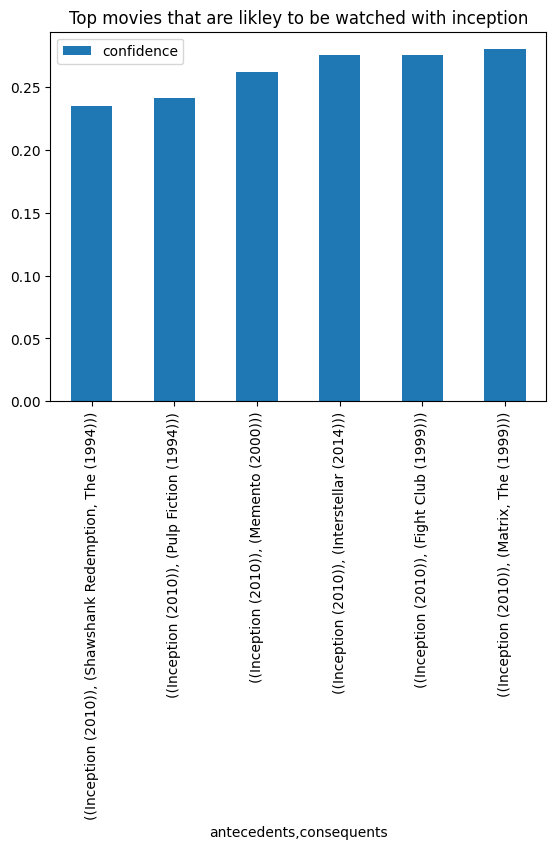

In [38]:
rules[rules["antecedents"].apply(lambda x: "Inception (2010)" in str(x))].groupby(
    ['antecedents', 'consequents'])[['confidence']].max().sort_values(ascending=False,
                                                                      by='confidence').head(10).plot(kind='bar').invert_xaxis()
plt.title('Top movies that are likley to be watched with inception');

<span style="color:blue">**Berikan Penjelasanmu Disini!**</span>
<br>

# $Visualisasi  Association  Rules  with   (Networkx)$ <br>
(FYI Exploring the result)<br>untuk melihat visualisasi jaringan antar film berdasarkan aturan asosiasi

In [39]:
rules['antecedents'] = rules.antecedents.apply(lambda x: next(iter(x)))
rules['consequents'] = rules.consequents.apply(lambda x: next(iter(x)))

In [40]:
!pip install nbformat==5.1.2

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

import networkx as nx
import warnings
warnings.filterwarnings('ignore')

init_notebook_mode(connected=True)

# Create a Plotly figure
fig = go.Figure()

edges = nx.from_pandas_edgelist(rules.sort_values(ascending=False,by='lift')
                           ,source='antecedents',target='consequents',edge_attr=None)
pos = nx.spring_layout(edges, seed=42)  # use spring_layout instead
# Add edges as scatter trace
edge_x = []
edge_y = []
for edge in edges.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

fig.add_trace(edge_trace)

# Add nodes as scatter trace
node_x = []
node_y = []
node_text = []
for node in edges.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(node)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=False,
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        line_width=2))

node_trace.text = node_text
fig.add_trace(node_trace)

# Set layout and display the figure
fig.update_layout(
    title='Top 100 movies in term of (lift)',
    title_font_size=25,
    font_size=18,
    showlegend=False,
    hovermode='closest',
    margin=dict(b=20,l=5,r=5,t=40),
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))

iplot(fig)